In [4]:
import sympy as sm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [2]:
def RCP_H1 (t, u, r1, q1, aC1, eC1, mC1, aP1, eP1, mP1): 
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)
    du[1] = (eC1*aC1*R*C) - (aP1*C*P) - mC1*C
    du[2] = (eP1*aP1*C*P) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

In [3]:
import lhsmdu as lh
pars = lh.createRandomStandardUniformMatrix(8,1000)
par1 = pars

#resources
par1[0] = par1[0]*6 ##intrinsic growth rate
par1[1] = par1[1]*(1/100000) ##carrying capacity

#consumers
par1[2] = par1[2]*0.5 ##attack rate
par1[3] = par1[3]*0.5 ##efficiency
par1[4] = par1[4]*0.7 ##mortality rate

#predators
par1[5] = par1[5]*0.7 ##attack rate
par1[6] = par1[6]*0.6 ##efficiency
par1[7] = par1[7]*0.8 ##mortality rate




In [6]:
prs = pd.DataFrame(par1)
prs.to_csv("C:/SDMS/trophic_temp/param_hycub.csv")

In [7]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
ids = np.arange(np.shape(par1)[1])
for i in ids:
    flnm = "plots_H1/H1_phase_" + str(i) + ".png"
    plt_title = "Phase plot - RCP" + str(i)
     
    r0 = par1[0][i]; q0 =  par1[1][i]
    aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; 
    aP0 = par1[5][i]; eP0 = par1[6][i]; mP0 = par1[7][i]; 

    u0 = np.array([5000, 280, 58, 0])
    p = (r0, q0, aC0, eC0, mC0, aP0, eP0, mP0)
    
    tend = 10000
    t_span = (0, tend)
    tint = np.linspace(0, tend, tend*100)
    
    print("simulation started")
    sl2 = solve_ivp (RCP_H1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    ssv = sl2.y[:,5000:]
    
    if np.shape(ssv)[1] > 0:
        tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]
        Rst = R[0]; Cst = C[0]; Pst = P[0] 
        Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 
        
        %matplotlib notebook
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1, projection='3d')
        ax.plot(R, C, P)
        ax.scatter(Rst, Cst, Pst, color='g')
        ax.scatter(Rend, Cend, Pend, color='r')
        ax.set_title(plt_title)
        fig.savefig(flnm)
        print(i)

    
    
    



simulation started


<IPython.core.display.Javascript object>


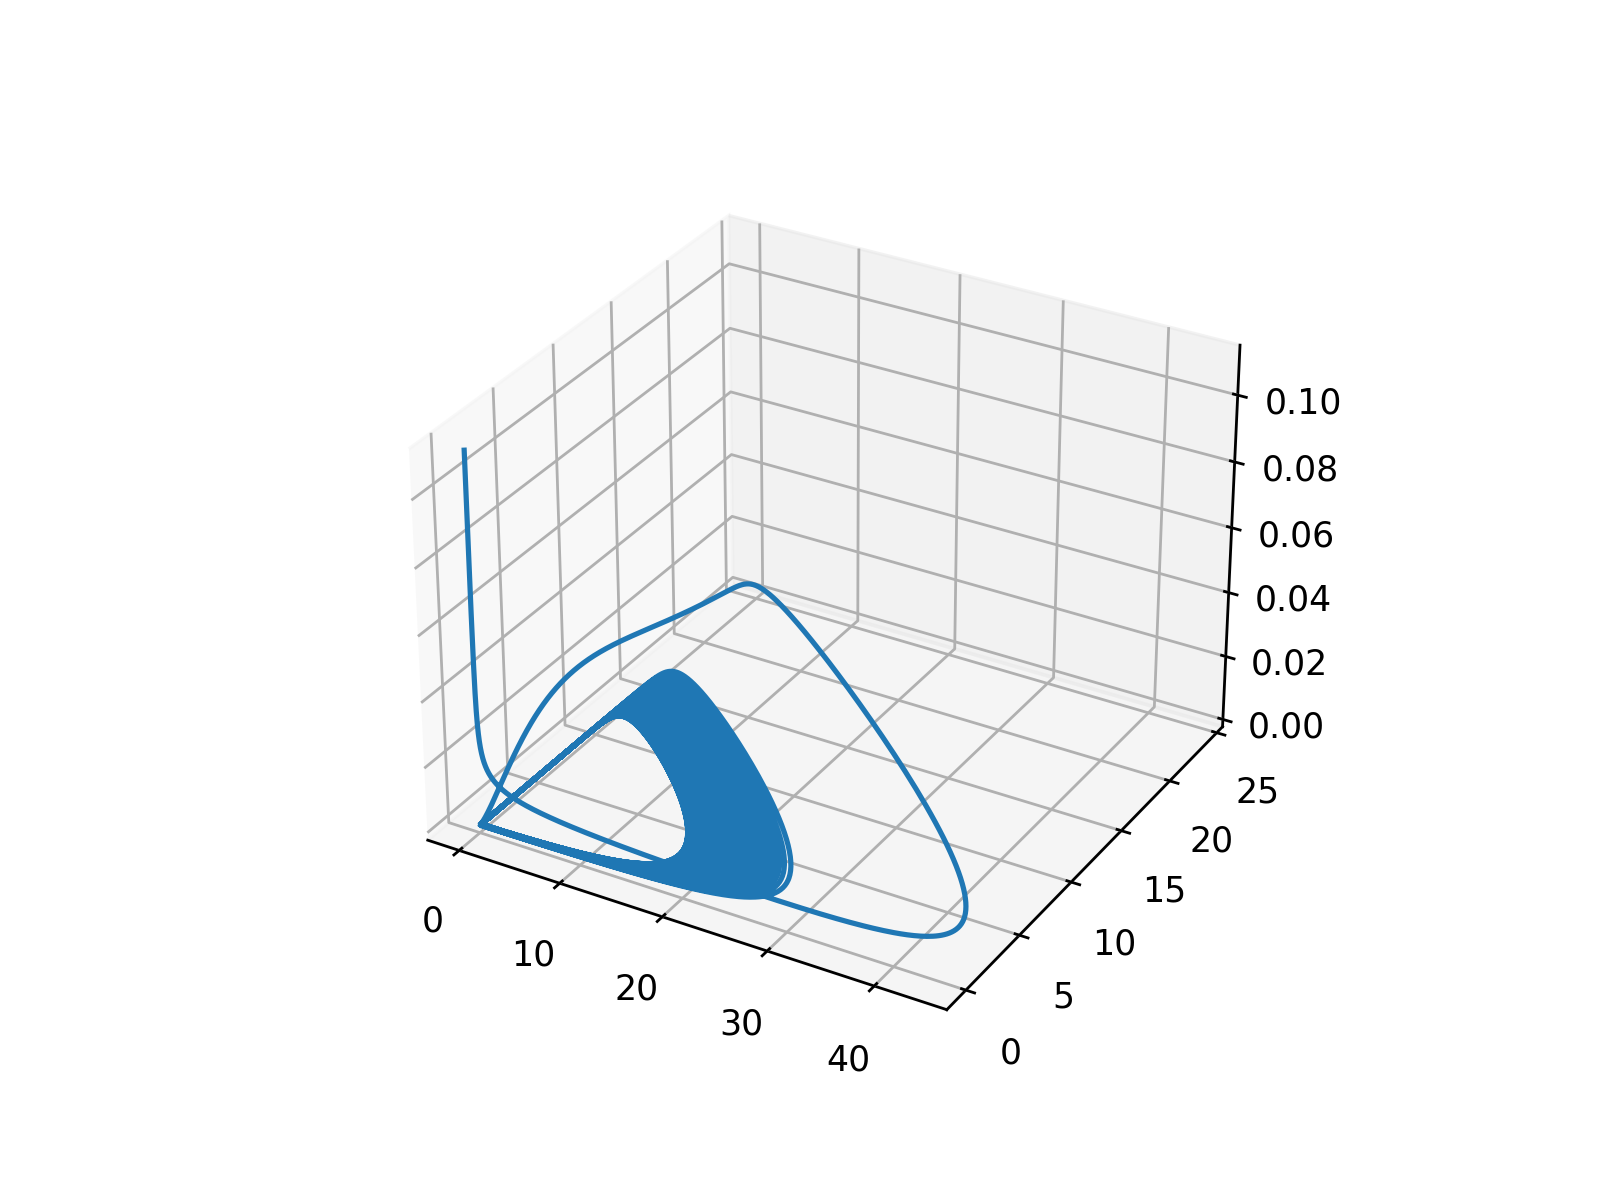

AttributeError: 'PathCollection' object has no property 'size'

In [24]:
i=5
flnm = "plots_H1/H1_phase_" + str(i) + ".png"
plt_title = "Phase plot - RCP  " + str(i)

r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; 
aP0 = par1[5][i]; eP0 = par1[6][i]; mP0 = par1[7][i]; 

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, mC0, aP0, eP0, mP0)

tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)

print("simulation started")
sl2 = solve_ivp (RCP_H1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
ssv = sl2.y[:,5000:]

if np.shape(ssv)[1] > 0:
    tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]
    Rst = R[0]; Cst = C[0]; Pst = P[0] 
    Rend = R[-1]; Cend = C[-1]; Pend = P[-1] 

    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot(R, C, P)
    ax.scatter(Rst, Cst, Pst, color='g')
    ax.scatter(Rend, Cend, Pend, color='r')
    ax.set_title(plt_title)
    fig.savefig(flnm)
    print(i)


In [13]:
R

array([3.37768476e-03, 3.40942039e-03, 3.44145424e-03, ...,
       9.99071739e+00, 1.00707072e+01, 1.01511387e+01])